In [1]:
import os
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as figure
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

エポック数：一つの訓練データを何回繰り返して学習させるか」の数のこと

In [2]:
def read_pickle(filepath):
    f = open(filepath,"rb")
    ld = pickle.load(f)
    return ld

In [3]:
def read_csv_file(filepath):
    df = pd.read_csv(filepath)
    return df

In [4]:
def show_evaluation(y_true,y_pred):
    print("MAE : ",mean_absolute_error(y_true, y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 : ",r2_score(y_true, y_pred))

In [16]:
def plot_result(train_result,test_result,bootstrap_result,figpath):
    # fig = plt.figure()
    # plt.scatter(train_result.iloc[:,0],train_result.iloc[:,1])
    # plt.scatter(test_result.iloc[:,0],test_result.iloc[:,1])
    # x = np.arange(-1.1, -0.4, 0.1)
    # y = x
    # plt.plot(x,y)
    # yyplot
    calculatedytrain = train_result["model_predict_x_train"]
    ytrain = train_result["y_train"]
    calculatedytest = test_result["model_predict_x_test"]
    ytest = test_result["y_test"]
    
    print("単一モデル：")
    show_evaluation(ytest,calculatedytest)
    
    plt.figure(figsize=figure.figaspect(1))
    plt.scatter(ytrain, calculatedytrain)
    plt.scatter(ytest,calculatedytest)
    plt.scatter(bootstrap_result.loc[:,"energy"],bootstrap_result.loc[:,"avg"])
    
    print("ブートストラップ平均:")
    show_evaluation(bootstrap_result.loc[:,"energy"],bootstrap_result.loc[:,"avg"])

    YMax = np.max( np.array([np.array(ytrain), calculatedytrain]))
    YMin = np.min( np.array([np.array(ytrain), calculatedytrain]))
    plt.plot([YMin-0.05*(YMax-YMin),YMax+0.05*(YMax-YMin)], [YMin-0.05*(YMax-YMin),YMax+0.05*(YMax-YMin)], 'k-')
    plt.ylim(YMin-0.05*(YMax-YMin),YMax+0.05*(YMax-YMin))
    plt.xlim(YMin-0.05*(YMax-YMin),YMax+0.05*(YMax-YMin))
    plt.xlabel("Actual Y")
    plt.ylabel("Calculated Y")
    plt.savefig(figpath)
    plt.show()

In [17]:
def estimate_SVM(parent_dir,learning_dir):
    dirpath = os.path.join(parent_dir,learning_dir)
    
    x_train = read_pickle(dirpath + "/x_train.p")
    x_test = read_pickle(dirpath + "/x_test.p")
    y_train = read_pickle(dirpath + "/y_train.p")
    y_test = read_pickle(dirpath + "/y_test.p")
    
    print("x_train length:",len(x_train))
    print("y_train length:",len(y_train))
    print("x_test length:",len(x_test))
    print("y_test length:",len(y_test))
    
#     print("\n📊scikit-learn SVM result📊\n")
#     f_svm = open(dirpath + "/default_svm_paramaters.txt","r")
#     for line in f_svm:
#         print(line) 
#     f_svm.close()
    
#     svm_train_result = read_pickle(dirpath + "/svm_train_result.p")
#     svm_test_result = read_pickle(dirpath + "/svm_test_result.p")
    
#     plot_result(svm_train_result,svm_test_result,dirpath+"/svm_result.png")
    
    
    print("\n📊scikit-learn optimized SVM result📊\n")
    f_svm_op = open(dirpath + "/param_optimized_svm.txt","r")
    for line in f_svm_op:
        print(line) 
    f_svm_op.close()
    op_svm_train_result = read_pickle(dirpath + "/optimized_svm_train_result.p")
    op_svm_test_result = read_pickle(dirpath + "/optimized_svm_test_result.p")
    bootstrap_result = read_pickle(dirpath + "/bootstrap_results.p")
    
    bigger_30per_std = read_pickle(dirpath + "/bigger_30per_std.p")
    plot_result(op_svm_train_result,op_svm_test_result,bigger_30per_std,dirpath+"/optimized_svm_result.png")
    
    # print("\n📊scikit-learn bagging optimized SVM result📊\n")
    # f_svm_op = open(dirpath + "/param_optimized_svm.txt","r")
    # for line in f_svm_op:
    #     print(line) 
    # f_svm_op.close()
    # op_bg_svm_train_result = read_pickle(dirpath + "/bagging_optimized_svm_train_result.p")
    # op_bg_svm_test_result = read_pickle(dirpath + "/bagging_optimized_svm_test_result.p")
    # plot_result(op_bg_svm_train_result,op_bg_svm_test_result,dirpath+"/bagging_optimized_svm_result.png")

In [18]:
def estimate(parent_dir,learning_dir):
    #estimate_NN(parent_dir,learning_dir)
    estimate_SVM(parent_dir,learning_dir)

In [24]:
def main():
    estimate("2022-12-19","20230329_1735")
    dirpath = os.path.join("2022-12-19","20230329_1735")
    op_svm_test_result = read_pickle(dirpath + "/optimized_svm_test_result.p")
    bigger_30per_std = read_pickle(dirpath + "/bigger_30per_std.p")
    bootstrap_result = read_pickle(dirpath + "/bootstrap_results.p")
    plt.figure(figsize=figure.figaspect(1))
    #plt.scatter(op_svm_test_result.index, op_svm_test_result.loc[:,"y_test"])
    plt.scatter(bootstrap_result.loc[:,"energy"],bootstrap_result.loc[:,"avg"])
    plt.scatter(bigger_30per_std.loc[:,"energy"],bigger_30per_std.loc[:,"avg"])

    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()

In [ ]:
#緑の点は、信頼度の低いと判定されたブートストラップ結果の平均値である。

x_train length: 484
y_train length: 484
x_test length: 121
y_test length: 121

📊scikit-learn optimized SVM result📊

kernel:	rbf

degree:	3

gamma:	0.25

coef0:	0.0

tol:	0.001

C:	0.5

epsilon:	0.0078125

shrinking:	True

cache_size:	200

verbose:	False

max_iter:	-1

単一モデル：
MAE :  0.025320201275521273
RMSE :  0.039037587681607144
R2 :  0.6627117726060492
ブートストラップ平均:
MAE :  0.04310312362071042
RMSE :  0.05575907617391946
R2 :  0.6960996095575782


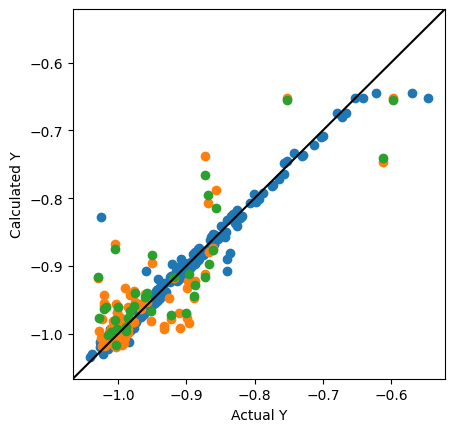

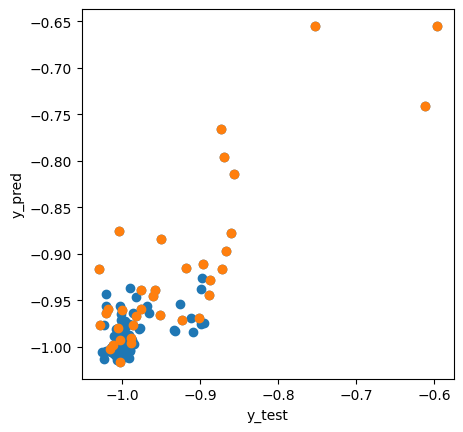

In [25]:
if __name__ == "__main__":
    main()

In [26]:
#✅ブートストラップで得られた「平均予測値」も一緒にプロットしてみると・・・？
#✅100個作ったsvmを保存する方法
#qdpyで1000回ループしてstdを計算し。それが大きい物を取り出してoxDNAに渡す
#それを100個のsvmに渡す

In [27]:
#オレンジの点は、100回のブートストラップをしたデータを予測させた結果、標準偏差のずれが大きかった上位30%をとったものである。
#こうしてみると、エネルギーが-1.0に近いものと、-0.95以上のものはずれが大きくなる傾向がありそうだ。

In [28]:
#理想はどのようなstrandsが失敗しやすいかを見つける
#結果がおかしいstrandsのデータを学習させると?